In [1]:
!pip install autograd

     |████████████████████████████████| 829 kB 26.0 MB/s 
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=db0f917c336b96300d7b6a83a646f9edea4e4ee317520d092beddb76d418963f
  Stored in directory: /tmp/pip-ephem-wheel-cache-wjvytk_t/wheels/ef/32/31/0e87227cd0ca1d99ad51fbe4b54c6fa02afccf7e483d045e04
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=edc16c2d11eb77cf17c1b9b61933f10e45a2b32ae7e1d4195636a5adee517ed3
  Stored in directory: /tmp/pip-ephem-wheel-cache-wjvytk_t/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built autograd future
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from baselines import *
from uncertainty import *

from autograd import numpy as np
from autograd import grad, elementwise_grad
from autograd.misc.optimizers import adam, sgd
from sklearn.datasets import make_moons
import numpy.random as npr
import pandas as pd
import numpy 
import scipy as sp
import matplotlib.pyplot as plt
import sys
%matplotlib inline


In [ ]:
# Generate a toy dataset for classification
samples = 100
class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_train = np.vstack((class_0, class_1))
y_train = np.array([0] * 100 + [1] * 100)

In [ ]:
# Deterministic model 
###relu activation
activation_fn_type = 'relu' #'leaky_relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x) #np.maximum(np.ones(x.shape)*1e-3, x) #WARNING: CHANGED THIS TO LEAKY RELU

###neural network model design choices
width = 4
hidden_layers = 2
input_dim = x_train.shape[1]
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)

In [ ]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':5000, 
          'random_restarts':1}
        
#fit my neural network to minimize MSE on the given data
nn.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = 0.0002)

Iteration 0 lower bound 0.4848077235976824; gradient mag: 0.10675425874309899
Iteration 100 lower bound 0.327633151234586; gradient mag: 0.6291763297002797
Iteration 200 lower bound 0.0927556103314503; gradient mag: 0.26310184920591095
Iteration 300 lower bound 0.04605878939023365; gradient mag: 0.10406272416550305
Iteration 400 lower bound 0.03158495273769316; gradient mag: 0.04851135054906836
Iteration 500 lower bound 0.026350535824297958; gradient mag: 0.028952980708230304
Iteration 600 lower bound 0.02373080321363635; gradient mag: 0.01880378082881867
Iteration 700 lower bound 0.02209306683778389; gradient mag: 0.014272115892857595
Iteration 800 lower bound 0.020966498842270535; gradient mag: 0.01081463405487488
Iteration 900 lower bound 0.020188445016587963; gradient mag: 0.009082127335883889
Iteration 1000 lower bound 0.019564442159865653; gradient mag: 0.007998569818649513
Iteration 1100 lower bound 0.0189791321690051; gradient mag: 0.007206885292722531
Iteration 1200 lower boun

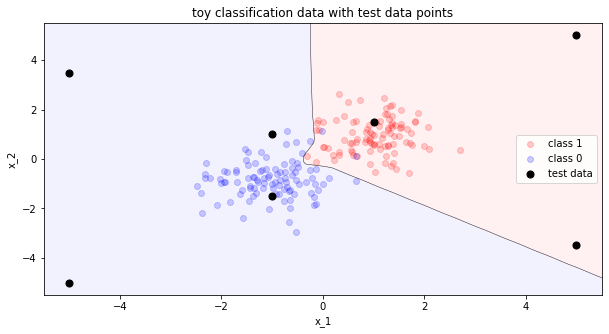

In [ ]:
# defining test points
test_points = [(-5, -5), (-5, 3.5), (5, 5), (5, -3.5), (-1, 1), (-1, -1.5), (1, 1.5)]

# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plot_decision_boundary(x_train, y_train, [nn], ax, poly_degree=1, test_points=test_points, shaded=True)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')
plt.show()

In [ ]:
# Deep ensemble
reg_param = 0.0002
random = np.random.RandomState(rand_state)
N_bootstrap = 20
nn_all, w_bootstrap = ensemble(x_train, y_train, Feedforward, architecture, params, random, N_bootstrap, reg_param)

Iteration 2300 lower bound 0.008535634852506167; gradient mag: 0.00399622368684599
Iteration 2400 lower bound 0.008328002251036342; gradient mag: 0.004131304200784522
Iteration 2500 lower bound 0.008133353605335191; gradient mag: 0.0038140104943913023
Iteration 2600 lower bound 0.007951937456220753; gradient mag: 0.0035656360065937434
Iteration 2700 lower bound 0.007798302710025279; gradient mag: 0.0037867332478215437
Iteration 2800 lower bound 0.007653616839505913; gradient mag: 0.0038704717682572077
Iteration 2900 lower bound 0.007514258182520911; gradient mag: 0.0036454221730574956
Iteration 3000 lower bound 0.00738370412444276; gradient mag: 0.0037856594514439033
Iteration 3100 lower bound 0.007260645557357044; gradient mag: 0.0036485211336585357
Iteration 3200 lower bound 0.007145001970058398; gradient mag: 0.0039137094197591385
Iteration 3300 lower bound 0.007036694041797122; gradient mag: 0.003743703825263811
Iteration 3400 lower bound 0.006938157725221924; gradient mag: 0.00774

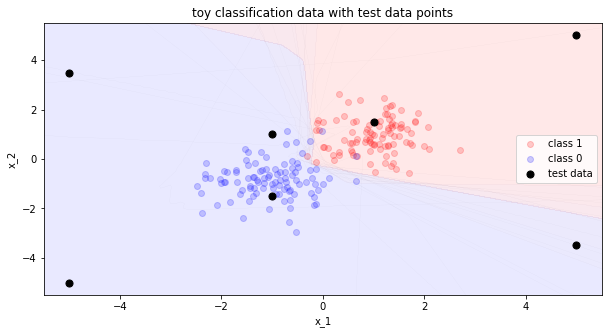

In [ ]:
# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
plot_decision_boundary(x_train, y_train, nn_all, ax, poly_degree=1, test_points=test_points, shaded=True)

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')
plt.show()

xx (14400, 2)


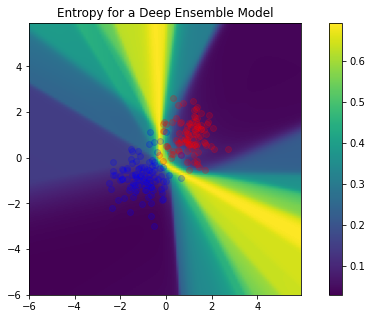

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_entropycontours(x_train, y_train, nn_all, w_bootstrap, ax, 'Entropy for a Deep Ensemble Model', poly_degree=1, test_points=test_points, shaded=True)# for i in range(len(test_points)):
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

In [ ]:
# set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

width = 6
hidden_layers = 2
input_dim = x_train.shape[1]
output_dim = 1

architecture_dropout = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'dropout_rate': 0.1,
               'activation_fn_type': activation_fn_type,
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}


#instantiate a Feedforward neural network object
nn_dropout = Feedforward_Dropout(architecture_dropout, random=random)

params = {'step_size':1e-3, 
          'max_iteration':10000, 
          'random_restarts':1}
#fit my neural network to minimize MSE on the given data
nn_dropout.fit(x_train.T, y_train.reshape((1,-1)), params, reg_param = .001)

Iteration 0 lower bound 0.5051496858031457; gradient mag: 0.1270938418689985
Iteration 100 lower bound 0.49736707520420165; gradient mag: 0.08500589897668884
Iteration 200 lower bound 0.3783179446640469; gradient mag: 0.3816397320234792
Iteration 300 lower bound 0.0843684547564083; gradient mag: 0.8061829438609024
Iteration 400 lower bound 0.14363112467208727; gradient mag: 0.148099894537858
Iteration 500 lower bound 0.31458638555874974; gradient mag: 0.1246615310948792
Iteration 600 lower bound 0.05164364435860587; gradient mag: 0.1030421818143468
Iteration 700 lower bound 0.0715394880476915; gradient mag: 0.11180539912821656
Iteration 800 lower bound 0.16520990240095565; gradient mag: 0.04579881591087051
Iteration 900 lower bound 0.04661126370065494; gradient mag: 0.04148173682874836
Iteration 1000 lower bound 0.03752635554522103; gradient mag: 0.03226654382384385
Iteration 1100 lower bound 0.0347608103638286; gradient mag: 0.22960874584959534
Iteration 1200 lower bound 0.05030289757

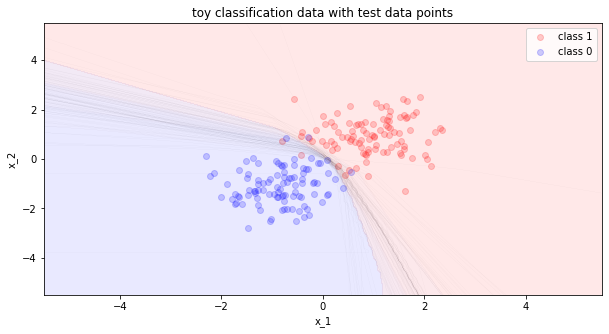

In [ ]:
# Visualize our test data points
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_decision_boundary(x_train, y_train, [nn_dropout]*100, ax, poly_degree=1, test_points=None, shaded=True)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

xx (14400, 2)


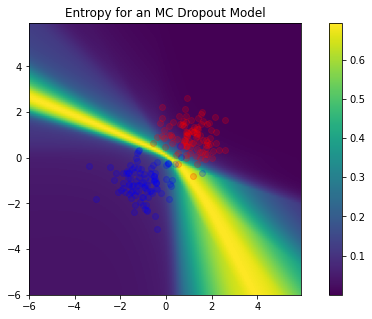

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_entropycontours(x_train, y_train, nn_dropout, [nn_dropout.weights]*50, ax, 'Entropy for an MC Dropout Model', poly_degree=1, test_points=test_points, shaded=True)# for i in range(len(test_points)):
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

In [ ]:
S = 20
max_iteration = 15000
step_size = 1e-3

Sigma_W = np.eye(nn.D)*25
sigma_y = 1

variational_params = variational_inference(Sigma_W, sigma_y, y_train, x_train.T, nn, nn.forward, S, max_iteration, step_size, 1)


Optimizing variational parameters...
Iteration 0 lower bound -1331.415430672532; gradient mag: 1082.4022588605637
Iteration 100 lower bound -910.8427508907621; gradient mag: 936.7574160280266
Iteration 200 lower bound -582.6420112342995; gradient mag: 731.9156374881254
Iteration 300 lower bound -442.23745430987856; gradient mag: 306.52509384068077
Iteration 400 lower bound -412.07345579830655; gradient mag: 128.96590245364473
Iteration 500 lower bound -401.437378945947; gradient mag: 69.11600995473584
Iteration 600 lower bound -395.06058647222244; gradient mag: 41.73898347113234
Iteration 700 lower bound -389.75515324615463; gradient mag: 27.230361450050253
Iteration 800 lower bound -385.01422640611736; gradient mag: 17.800228558351982
Iteration 900 lower bound -380.75268842648916; gradient mag: 13.066918924177013
Iteration 1000 lower bound -376.69868945751375; gradient mag: 10.574299836081185
Iteration 1100 lower bound -372.71294077424733; gradient mag: 8.899577099691754
Iteration 120

In [ ]:
var_means = variational_params[0:nn.D]
var_variance = np.exp(variational_params[nn.D:])**2


samples = 100
class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_test = np.vstack((class_0, class_1))
y_test = np.array([0] * samples + [1] * samples)


posterior_sample_size = 200
posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
y_predict_noiseless = nn.forward(posterior_samples, x_test.T) # CHECK: Why are we doing the forward through the DROPOUT model?
y_predict_noiseless = np.squeeze(y_predict_noiseless)

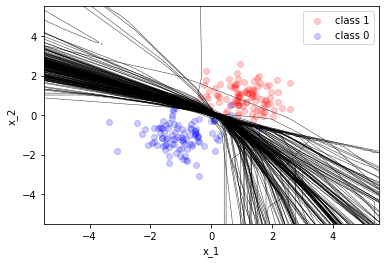

In [ ]:
fig,ax = plt.subplots(1,1)
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')
for i in range(posterior_sample_size):
    plot_decision_boundary(x_test, y_predict_noiseless[i,:], nn, ax, poly_degree=1, test_points=None, shaded=False)

In [ ]:
posterior_samples[0], posterior_samples[1]

(array([ 8.0298581 ,  1.62873738, -2.72469459, -1.64210062, -5.65464333,
        -0.81432108, -1.01199937,  2.44433607,  6.90361487,  4.58172076,
         2.03056228, -1.46958954, -0.11396774, -0.05103295, -0.10426103,
         0.23245974, -0.29335492, -0.59089587, -3.03712475, -1.9681249 ,
         1.03148027, -1.9119053 ,  1.16160275, -3.08433273,  2.88896853,
         3.00122404,  3.31736149,  0.946948  , -1.04746312, -0.87802652,
        -2.85354034, -0.03658698,  0.55350591,  1.06317842, -0.9577415 ,
         4.34150198,  5.63618907]),
 array([-0.67345988, -0.5324361 , -3.4603941 ,  0.31609399, -0.87673696,
        -1.5316301 ,  0.19641328, -2.03378054, -1.48519543,  4.35467332,
         4.11468399,  1.69823622, -3.33326923,  1.02783746, -0.21156398,
        -3.22093801,  0.62594166, -0.47515401, -2.51979057,  0.80506444,
        -1.64731458,  0.28126726,  1.97151934, -2.05632036,  1.23962035,
         3.3912136 ,  1.78181526,  2.7801751 , -2.55456735, -0.34163207,
        -0.8711

xx (14400, 2)


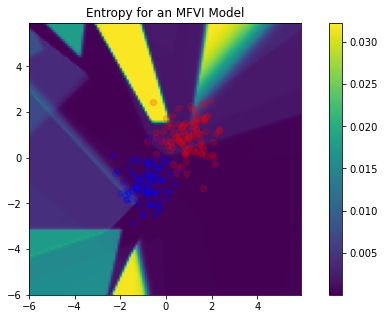

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], alpha=0.2, c='blue', label='class 0')

plot_entropycontours(x_train, y_train, nn, [posterior_samples[i].reshape((1, -1)) for i in range(posterior_samples.shape[0])], ax, 'Entropy for an MFVI Model', poly_degree=1, test_points=test_points, shaded=True)# for i in range(len(test_points)):
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points')
ax.legend(loc='best')

plt.show()

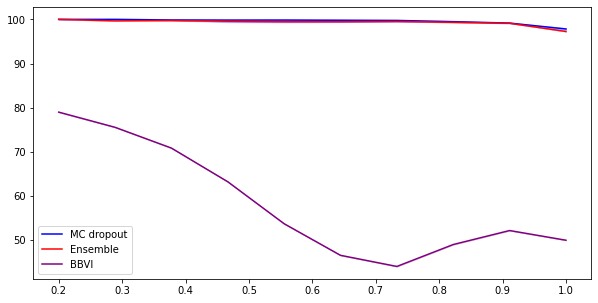

In [ ]:
# uncertainty metric
samples = 1000 
n_run = 100 # the number of times to call the NN for predicative entropy 
N = 20

class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
x_test = np.vstack((class_0, class_1))
y_test = np.array([0] * samples + [1] * samples)

retain_perc = np.linspace(0.2, 1, 10)
auc = np.zeros([len(retain_perc),N])
auc_det = np.zeros([len(retain_perc),N])
auc_ens = np.zeros([len(retain_perc),N])
auc_bbvi = np.zeros([len(retain_perc),N])
for (i, perc) in enumerate(retain_perc):
    for j in range(N):
        auc[i,j] = auc_calc(x_test, y_test, nn_dropout, N, perc, "mc")
        posterior_samples = np.random.multivariate_normal(var_means, np.diag(var_variance), size=posterior_sample_size)
        auc_bbvi[i,j] = auc_calc(x_test, y_test, nn, N, perc, "bbvi", weightlist=posterior_samples)
        
    auc_ens[i,:] = auc_calc(x_test, y_test, nn_all, 1, perc, "ensemble")

    # use sigmoid probability for retaining data
    auc_det[i,:] = auc_calc(x_test, y_test, nn, N, perc, "deterministic")

auc_ub = np.percentile(auc, 97.5, axis=1)
auc_lb = np.percentile(auc, 2.5, axis=1)

auc_ub_ens = np.percentile(auc_ens, 97.5, axis=1)
auc_lb_ens = np.percentile(auc_ens, 2.5, axis=1)

auc_ub_bbvi = np.percentile(auc_bbvi, 97.5, axis=1)
auc_lb_bbvi = np.percentile(auc_bbvi, 2.5, axis=1)

fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.fill_between(retain_perc, auc_ub, auc_lb, color='blue', alpha=0.2)
ax.plot(retain_perc, np.mean(auc,axis=1), 'blue', label='MC dropout')
ax.plot(retain_perc, np.mean(auc_ens,axis=1), 'red', label='Ensemble')
ax.plot(retain_perc, np.mean(auc_bbvi,axis=1), 'purple', label='BBVI')
ax.plot(retain_perc, np.mean(auc_det,axis=1), 'green', label='Deterministic')
ax.fill_between(retain_perc, auc_ub_bbvi, auc_lb_bbvi, color='purple', alpha=0.2)
ax.fill_between(retain_perc, auc_ub_ens, auc_lb_ens, color='red', alpha=0.2)
ax.legend()
plt.show()


In [ ]:
fig,ax = plt.subplots(1,1)
ax.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], alpha=0.2, c='red', label='class 1')
ax.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], alpha=0.2, c='blue', label='class 0')

NameError: name 'plt' is not defined